# All dogs go to heaven, but only some go to national championships

data sources:
https://www.seattletimes.com/sports/uw-husky-football/woo-woos-for-a-weary-world-uws-live-mascot-dubs-ii-spreads-cute-dog-content-to-the-masses/
https://gohuskies.com/sports/2013/4/18/208229209.aspx
https://api.collegefootballdata.com/api/docs/?url=/api-docs.json

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
mascot_data = pd.read_csv("mascot_data.csv")
mascot_data.head()

,mascot_name,start_date,end_date
0,Frosty I,1922,1929
1,Frosty II,1930,1936
2,Wasky,1946,1946
3,Wasky II,1947,1953
4,Ski,1954,1957


In [3]:
mascot_data["seasons"] = mascot_data["end_date"] - mascot_data["start_date"]
mascot_data.head()

,mascot_name,start_date,end_date,seasons
0,Frosty I,1922,1929,7
1,Frosty II,1930,1936,6
2,Wasky,1946,1946,0
3,Wasky II,1947,1953,6
4,Ski,1954,1957,3


In [4]:
national_championships = [1960, 1984, 1990, 1991]

In [5]:
win_pcts = []
total_wins = []
colors = []

for index, row in mascot_data.iterrows(): 
    wins = 0
    total_games = 0
    seasons = list(range(row["start_date"], row["end_date"] + 1))
    color = "#363C74"
    for season in seasons:
        if season in national_championships:
            color = "#E8D3A2"
        parameters = {"year": season,"seasonType": "regular", "team": "Washington"}
        response = requests.get("https://api.collegefootballdata.com/games", params=parameters)
        games = response.json()
        for game in games:
            total_games += 1
            if (game["home_team"] == "Washington" and game["home_points"] > game["away_points"]) or (game["away_team"] == "Washington" and game["away_points"] > game["home_points"]):
                wins += 1
    win_pcts.append(wins / total_games)
    colors.append(color)
    total_wins.append(wins)
    
mascot_data["win_percentages"] = win_pcts
mascot_data["colors"] = colors
mascot_data.head()

,mascot_name,start_date,end_date,seasons,win_percentages,colors
0,Frosty I,1922,1929,7,0.740741,#363C74
1,Frosty II,1930,1936,6,0.629032,#363C74
2,Wasky,1946,1946,0,0.555556,#363C74
3,Wasky II,1947,1953,6,0.420290,#363C74
4,Ski,1954,1957,3,0.375000,#363C74


In [6]:
mascot_data

,mascot_name,start_date,end_date,seasons,win_percentages,colors
0,Frosty I,1922,1929,7,0.740741,#363C74
1,Frosty II,1930,1936,6,0.629032,#363C74
2,Wasky,1946,1946,0,0.555556,#363C74
3,Wasky II,1947,1953,6,0.420290,#363C74
4,Ski,1954,1957,3,0.375000,#363C74
5,Denali,1958,1958,0,0.300000,#363C74
6,King Chinook,1959,1968,9,0.610000,#E8D3A2
7,Regent Denali,1969,1980,11,0.553846,#363C74
8,Sundodger Denali,1981,1991,10,0.735537,#E8D3A2
9,King Redoubt,1992,1997,5,0.696970,#363C74


In [ ]:
mascot_data["labels"] = mascot_data["mascot_name"] + "\n (" + mascot_data["start_date"].apply(str) + "-" + mascot_data["end_date"].apply(str) + ")"

In [24]:
mascot_data["win_percentages"] = mascot_data["win_percentages"] * 100.0

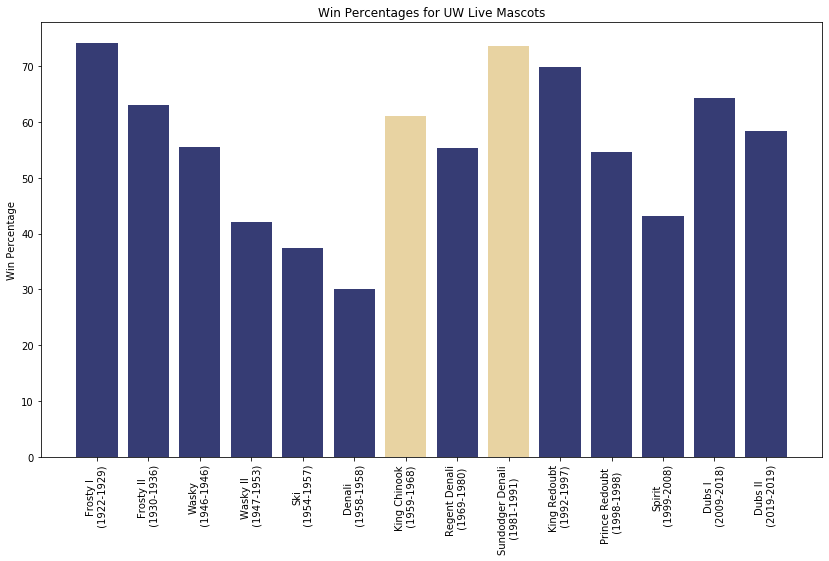

In [25]:
plt.figure(figsize=(14,8))
plt.bar(x=mascot_data.index, height=mascot_data.win_percentages, color=mascot_data.colors)
plt.xticks(mascot_data.index, mascot_data.labels)
plt.title("Win Percentages for UW Live Mascots")
plt.xticks(rotation=90)
plt.ylabel("Win Percentage")
plt.show()